In [115]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## É possível predizer quantas estrelas foram dadas em um review de uma empresa com base no texto de comentário ?

In [2]:
json_size = 150000
for _json in pd.read_json('../yelp_dataset/yelp_academic_dataset_review.json', chunksize=json_size, lines=True):
    reviews = _json
    break

In [3]:
business = pd.read_json('../yelp_dataset/yelp_academic_dataset_business.json', lines=True)
columns_to_stay = ['business_id','name','stars']
business = business[columns_to_stay]
business.head()

,business_id,name,stars
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,4.0
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,4.5
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,4.0
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,1.5
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,2.0


In [4]:
dataset = reviews.merge(business,how='left', on='business_id')
dataset.rename({'stars_x':'review stars', 'stars_y':'business stars'},inplace=True, axis='columns')
dataset_columns_to_stay = ['name','business_id','text','review stars','business stars','cool',  'useful', 'funny']
dataset = dataset[dataset_columns_to_stay]
dataset.to_json('../yelp_dataset/dataset.json')
dataset.head()

,name,business_id,text,review stars,business stars,cool,useful,funny
0,Secret Pizza,iCQpiavjjPzJ5_3gPD5Ebg,The pizza was okay. Not the best I've had. I p...,2,4.0,0,0,0
1,Leticia's Mexican Cocina,pomGBqfbxcqPv14c3XH-ZQ,I love this place! My fiance And I go here atl...,5,4.0,0,0,0
2,H&H BBQ Plus 2,jtQARsP6P-LbkyjbO1qNGg,Terrible. Dry corn bread. Rib tips were all fa...,1,3.5,1,3,1
3,Pin Kaow Thai Restaurant,elqbBhBfElMNSrjFqW3now,Back in 2005-2007 this place was my FAVORITE t...,2,4.0,0,2,0
4,Braddah's Island Style,Ums3gaP2qM3W1XcA5r6SsQ,Delicious healthy food. The steak is amazing. ...,5,4.0,0,0,0


### Verificando correlação das features com a feature target
- Observa-se que a única coluna que tem grande correlação é a business star, contudo ela é inviesada por ser a média de todas as reviews stars. 

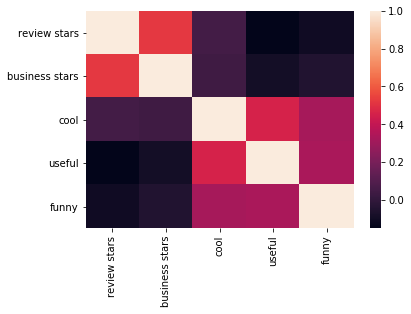

In [5]:
sns.heatmap(dataset.corr())

### Verificando integridade dos dados
- Verificar se existe alguma coluna nula
- Verificar o mínimo e máximo dos valores das features
- Dropar, se pertinente, textos incoerentes

In [6]:
dataset[dataset.isnull().any(axis=1)].shape

(0, 8)

In [7]:
dataset.text.str.len().min()

1

In [8]:
dataset.text.str.len().max()

5000

In [9]:
dataset[(dataset.text.str.len() < 4 )].count()

name              1
business_id       1
text              1
review stars      1
business stars    1
cool              1
useful            1
funny             1
dtype: int64

In [10]:
dataset.drop(dataset[(dataset.text.str.len() < 4 )].index,inplace=True)

In [11]:
dataset.max()

name                                               ​Century Library
business_id                                  zzwicjPC9g246MK2M1ZFBA
text              Über Frau Kähler hört man sehr viel gutes. Mit...
review stars                                                      5
business stars                                                    5
cool                                                             90
useful                                                          536
funny                                                           328
dtype: object

In [12]:
dataset.min()

name                                                      # 1 Nails
business_id                                  --6MefnULPED_I942VcFNA
text              !!! BIG WOW !!!\n\nMy wife and I held our wedd...
review stars                                                      1
business stars                                                    1
cool                                                              0
useful                                                            0
funny                                                             0
dtype: object

### Verificando distribuição da feature target

In [13]:
starts_total = dataset.groupby('review stars')['review stars'].count()

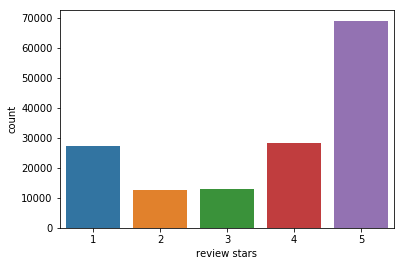

In [14]:
sns.countplot(x=dataset['review stars'], data=dataset)

### Criando WordCloud

In [16]:
all_text = " ".join(review for review in dataset.text)

In [17]:
wordcloud = WordCloud().generate(all_text)

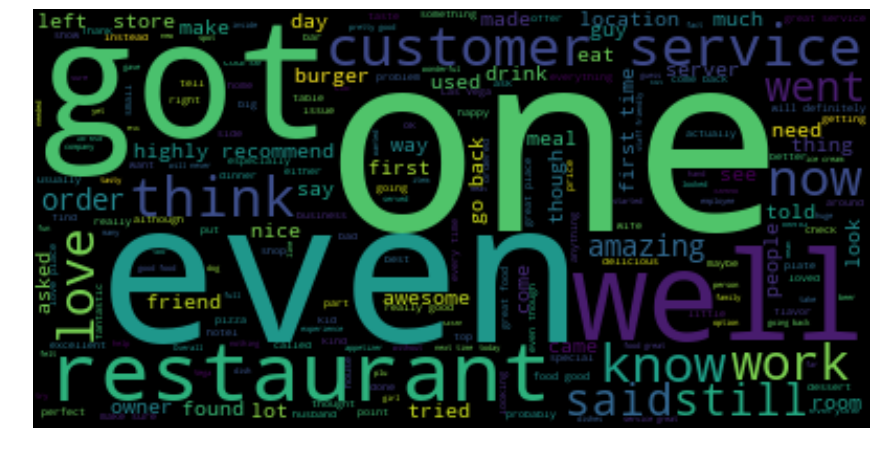

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### WordCloud por rating

In [7]:
texts1 = " ".join(text for text in dataset['text'][dataset['review stars'] == 1])
texts2 = " ".join(text for text in dataset['text'][dataset['review stars'] == 2])
texts3 = " ".join(text for text in dataset['text'][dataset['review stars'] == 3])
texts4 = " ".join(text for text in dataset['text'][dataset['review stars'] == 4])
texts5 = " ".join(text for text in dataset['text'][dataset['review stars'] == 5])

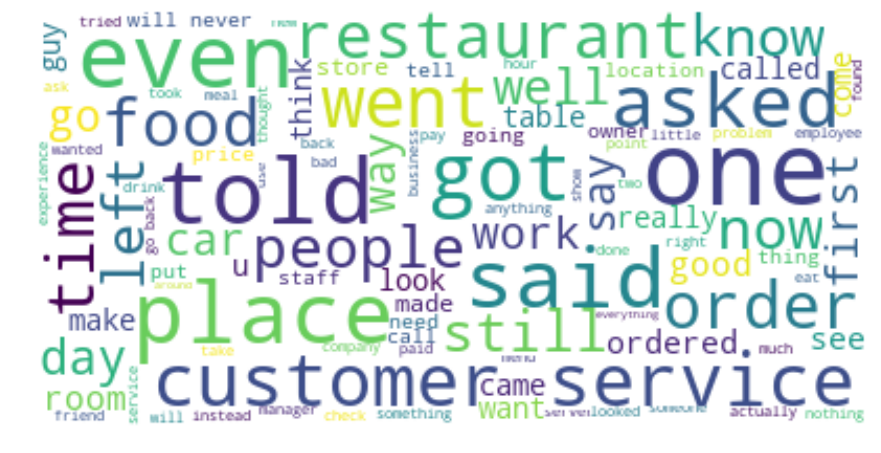

In [11]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts1)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

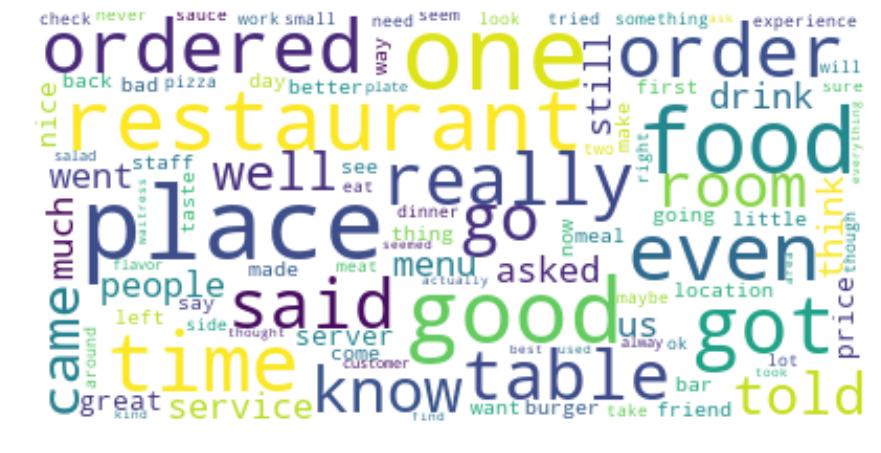

In [12]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts2)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

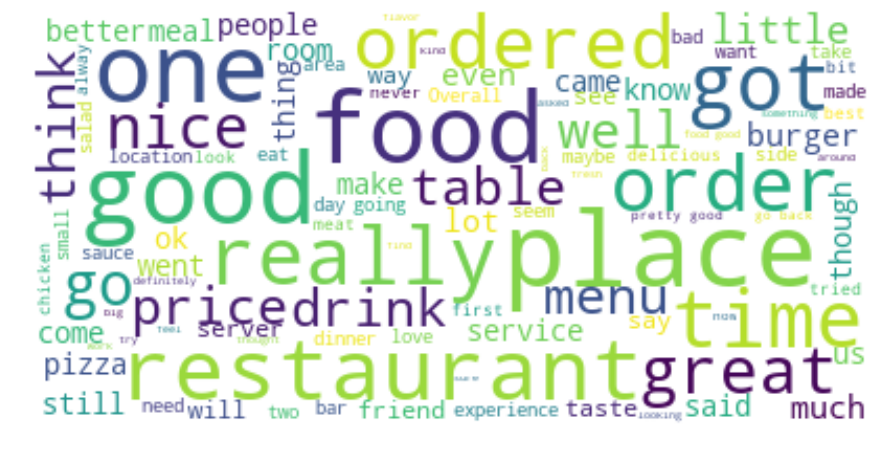

In [13]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts3)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

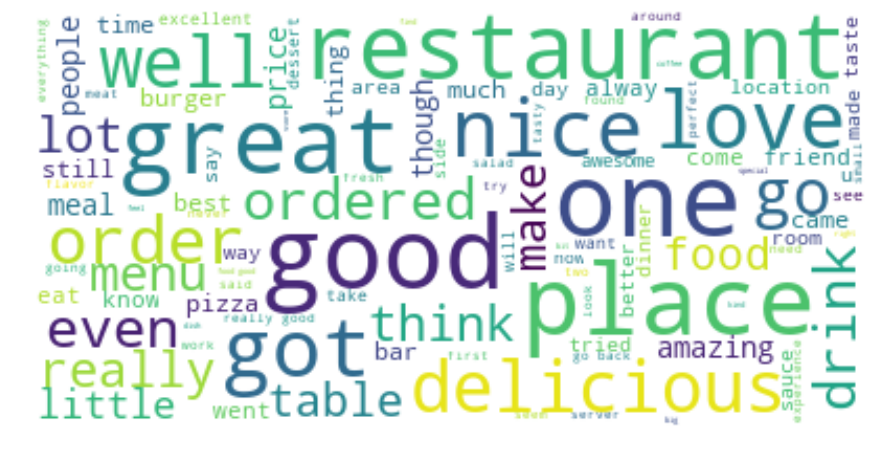

In [14]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts4)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

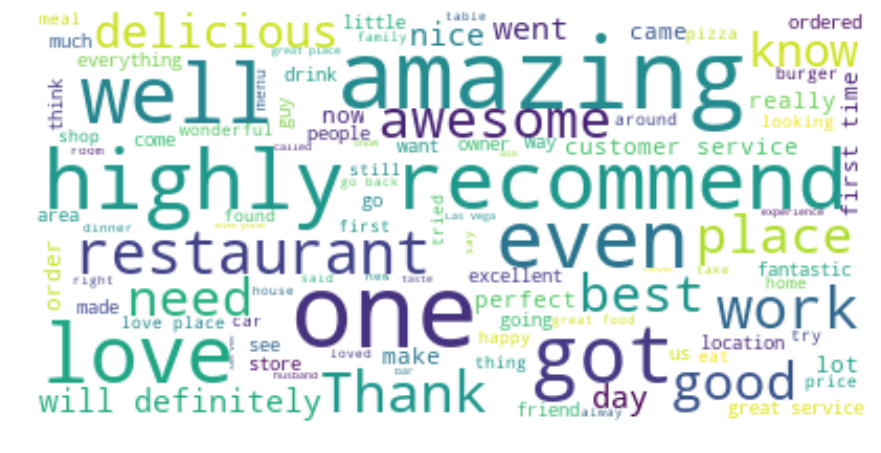

In [15]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts5)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [16]:
dataset['review stars'].shape

(149999,)

In [17]:
X = dataset['text'].tolist()
y = dataset['review stars'].tolist()


_pipe = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words='english',lowercase=True,analyzer='word',token_pattern=r'\w+')),
    ('linear', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X, y)

_pipe.fit(X_train, y_train)
predict_linear = _pipe.predict(X_test)

In [18]:
print(mean_squared_error(y_test,predict_linear))

2.596008973117845


In [33]:
_pipe_knr = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words='english',lowercase=True,analyzer='word',token_pattern=r'\w+')),
    ('KNR', KNeighborsRegressor(n_neighbors=5))
])
_pipe_knr.fit(X_train, y_train)
predict_knr = _pipe.predict(X_test)

KeyboardInterrupt: 

In [20]:
print(mean_squared_error(y_test,predict_knr))

2.596008973117845


In [123]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tfidf = TfidfVectorizer(stop_words='english',lowercase=True,analyzer='word',token_pattern=r'\w+')
svd = TruncatedSVD()
kmeans =  KMeans(n_clusters=5, n_init=1)

In [81]:
pipe = make_pipeline(tfidf,svd, kmeans)

In [82]:
pipe.fit(dataset['text'])

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth... n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [83]:
labels = pipe.predict(dataset['text'])

In [129]:
m = tfidf.fit_transform(dataset['text'])

In [85]:
data_set = pd.DataFrame({'result':labels, 'stars':dataset['review stars'], 'text':dataset['text']})

In [86]:
data_set.head()

,result,stars,text
0,3,2,The pizza was okay. Not the best I've had. I p...
1,0,5,I love this place! My fiance And I go here atl...
2,1,1,Terrible. Dry corn bread. Rib tips were all fa...
3,4,2,Back in 2005-2007 this place was my FAVORITE t...
4,0,5,Delicious healthy food. The steak is amazing. ...


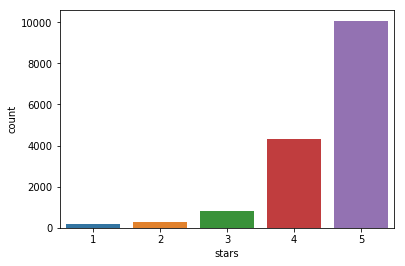

In [87]:
data = data_set[data_set['result'] == 0]
sns.countplot(x=data['stars'], data=dataset)

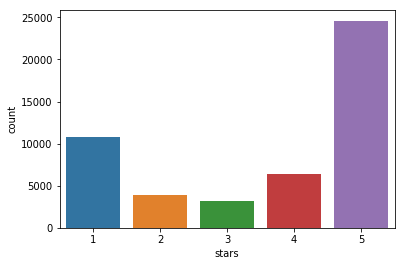

In [88]:
data = data_set[data_set['result'] == 1]
sns.countplot(x=data['stars'], data=dataset)

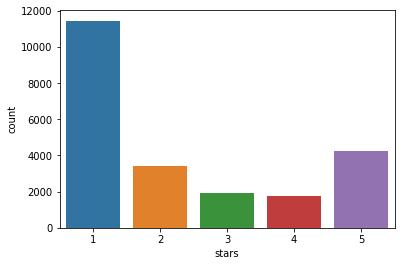

In [89]:
data = data_set[data_set['result'] == 2]
sns.countplot(x=data['stars'], data=dataset)

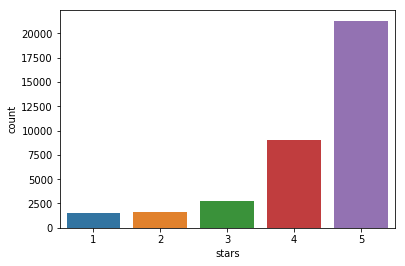

In [90]:
data = data_set[data_set['result'] == 3]
sns.countplot(x=data['stars'], data=dataset)

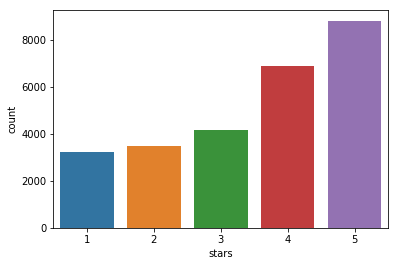

In [91]:
data = data_set[data_set['result'] == 4]
sns.countplot(x=data['stars'], data=dataset)

In [97]:
total_stars = data_set['stars'].value_counts()
total_clusters = data_set.groupby('result')['stars'].value_counts()

print(total_stars)
print(total_clusters)

5    69004
4    28341
1    27150
3    12809
2    12695
Name: stars, dtype: int64
result  stars
0       5        10074
        4         4315
        3          834
        2          276
        1          165
1       5        24595
        1        10748
        4         6378
        2         3864
        3         3131
2       1        11455
        5         4225
        2         3425
        3         1927
        4         1739
3       5        21299
        4         9035
        3         2773
        2         1660
        1         1545
4       5         8811
        4         6874
        3         4144
        2         3470
        1         3237
Name: stars, dtype: int64


In [121]:
stars = []
clusters = []
percents = []
for i in range(0,5):
    for k in range(1, 6):
        stars.append(k)
        clusters.append(i)
        percents.append((total_clusters[(i,k)] / total_stars[k]) * 100)

In [120]:
percent_result = pd.DataFrame({'star':stars, 'cluster':clusters, 'percent':percents})
percent_result

,cluster,percent,star
0,0,0.607735,1
1,0,2.174084,2
2,0,6.511047,3
3,0,15.225292,4
4,0,14.599154,5
5,1,39.587477,1
6,1,30.437180,2
7,1,24.443750,3
8,1,22.504499,4
9,1,35.642861,5


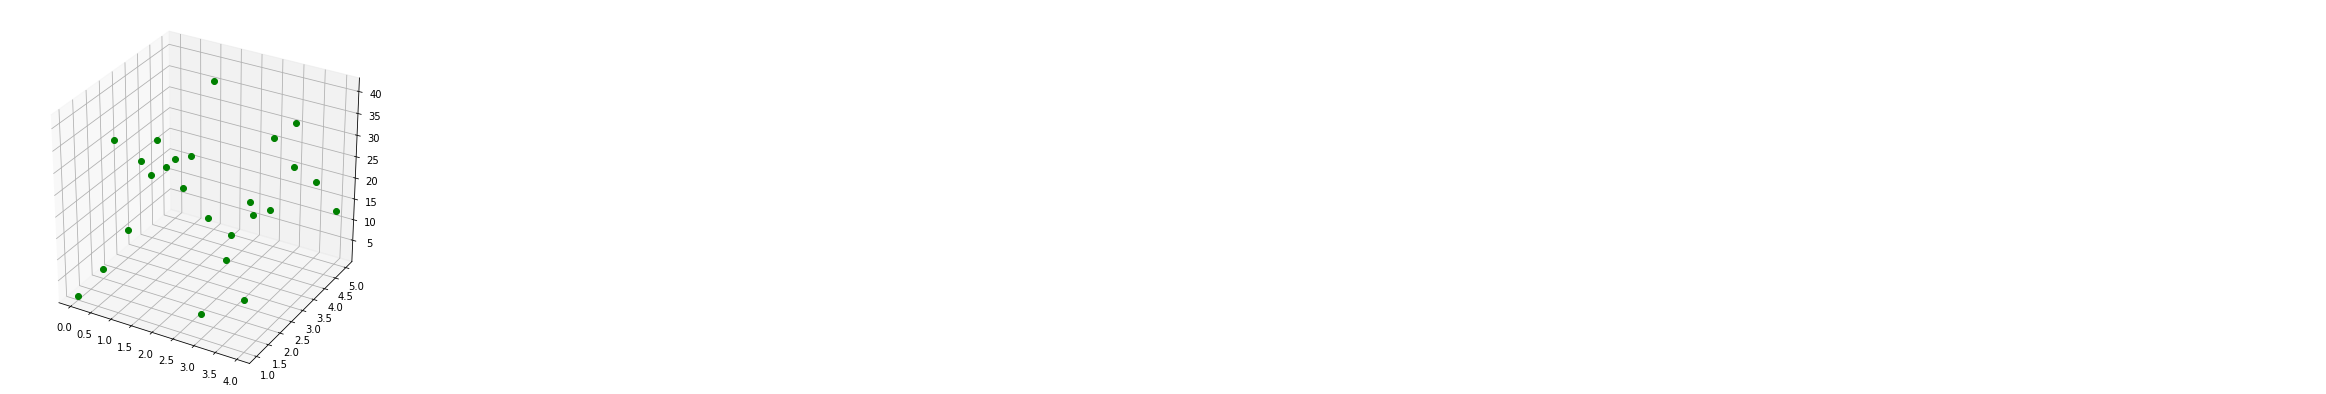

In [119]:
x = clusters
y = stars
z = percents

fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(1,1,1, projection='3d')
points, = ax.plot(x, y, z, c='g', marker='o', linestyle="")
plt.show()

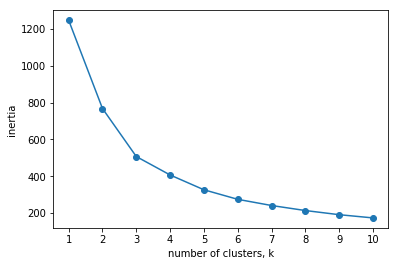

In [122]:
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    svd = TruncatedSVD()
    kmeans = KMeans(n_clusters=k)
    
    pipeline = make_pipeline(svd, kmeans)
    # Fit model to samples
    pipeline.fit(m)
    
    # Append the inertia to the list of inertias
    inertias.append(pipeline.steps[1][1].inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [131]:
ks = range(2, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    svd = TruncatedSVD()
    spec = SpectralClustering(n_clusters=k)
    
    pipeline_spec = make_pipeline(svd, spec)
    # Fit model to samples
    pipeline_spec.fit(m)
    
    # Append the inertia to the list of inertias
    inertias.append(pipeline_spec.steps[1][1].inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

MemoryError: 